1) Antes que nada, lee cuidadosamente estas instrucciones y las que aparecen en la hoja con la contraseña. .

2) Cambia el nombre de este archivo sustituyendo "nombre.apellido" por los tuyos, tal como aparecen en tu dirección de correo electrónico de la UAM.

3) Este archivo debe quedar en la carpeta "ENTREGA..." que está en el escritorio de tu cuenta de examen. Lo mejor es que esté en esa carpeta desde el comienzo del examen.

4) El examen resuelto debe quedar en este único archivo. No se puede usar un archivo para cada pregunta.

5) Recuerda que hay que deshabilitar el salvapantallas al comenzar el examen, tal como está indicado en la hoja con la contraseña. 


CALIFICACIÓN:


In [2]:
2+1+2

5

## SI ESTE CUADERNO NO FUNCIONA, PRUEBA EL OTRO, POR FAVOR. SE LLAMA IGUAL PERO ACABA EN AUX

COMENTARIOS:

1)

## Ejercicio 1

(3 puntos) Podemos estimar el valor de $\alpha(x):=\sqrt{1+x}$ como $\beta(x):=1+(x/2)$ cuando $x$ es,  en valor absoluto,  suficientement próximo a cero. Consideramos que la estimación *es aceptable* cuando  el error relativo $$E(x):=\frac{abs(\alpha(x)-\beta(x))}{\alpha(x)}$$ que cometemos es menor que $0.01$. 

1) Determina, experimentalmente,  una cota $\vert x\vert < A$ tal que la estimación es aceptable para los $x$ que la cumplen, y deja de serlo para $\vert x\vert \ge A$. 

2) ¿Qué podemos hacer para mejorar la estimación? Postula una nueva estimación $\beta_1(x)$ y demuestra que con ella se obtienen resultados bastante más precisos.

In [1]:
'''Definimos funciones alfa, beta y una funcion que me devuelva el error relativo cometido'''
def a(x):
    return sqrt(1+x)

def b(x):
    return 1 + (x/2)

def relativo(x):
    return (abs(a(x) - b(x))/a(x)).n(prec = 15)

'''Buscamos la cota a partir de una lista de la forma 1/n'''
L = []
for i in srange(1, 10):
    L.append(1/i)   
L.reverse()

for item in L:
    if relativo(item) >= 0.01:
        show((item, relativo(item)))
        break
        
    



(1/3, 0.01041)

Vemos que en x = 1/3 el error ya no es tolerable, asi que la cota se encuentra entre 1/3 y 1/4.

Intentamos comprobar donde de manera mas precisa, teniendo en cuenta que 1/3 y 1/4 son dos fracciones separadas entre si por 100 "trozos" de tamaño 1/1200

In [13]:
L = []
for i in srange(0, 110):
    L.append((1/3) - (i/1200))
L.reverse()

for item in L:
    if relativo(item) >= 0.01:
        show((item, relativo(item)))
        break

(49/150, 0.01002)

Al disminuir el tamaño dfe las particiones encontramos una nuea cota, que dejaremos como definitiva: 49/150

¿Una aproximacion mejor para $\alpha (x)$? Probamos con $\beta _1(x) = 1 + 0.45x $

In [14]:
def b1(x):
    return (1 + 0.45 * x)

def relativo1(x):
    return (abs(a(x) - b1(x))/a(x)).n(prec = 15)

L = []
for i in srange(1, 10):
    L.append(1/i)   
L.reverse()

for item in L:
    if relativo1(item) >= 0.01:
        show((item, relativo1(item)))
        break
        

(1, 0.02533)

Con esta nueva pendiente para la aproximación, obtenemos que el error relativo obtenido deja de ser tolerable en x = 1, no en x = 1/3, como antes

## Ejercicio 2

(3 puntos) John Napier publicó su invención de los logaritmos en 1614, mucho antes de la invención del cálculo diferencial. El punto esencial para que los logaritmos fueran útiles era la existencia de *tablas de logaritmos* en las que uno encontraba los logaritmos de los factores, que sumaba a mano, y volvía a usar para encontrar el número cuyo logaritmo era la suma obtenida, es decir,  el producto de los números de partida. 
Henry Briggs colaboró con Napier para producir las primeras tablas de logaritmos mediante el siguiente procedimiento:

1) Queremos calcular el logaritmo de un entero $n>1$. Calculamos $n^{1/2^k}$ para $k=1,2,3,\dots$ hasta que el resultado difiera *muy poco* de $1$. Esto es lo mismo que iterar la extracción de raíces cuadradas hasta llegar casi a $1$. Escribimos 
$$n^{1/2^k}=1+x.$$

2) Ahora tomamos logaritmos para obtener 
$$log(n)=2^klog(1+x).$$

3) Finalmente, Briggs observó que para $x$ suficientemente pequeño en valor absoluto, podía sustituir $log(1+x)$ por $x$, y quedaba $log(n)$ aproximadamente igual a  $2^kx.$ 

Es claro que lo que necesitamos es saber *cómo de pequeño tiene que ser $x$ para obtener un número prefijado $k$ de cifras decimales exactas del logaritmo de $n$.*

A) Define una función $buscar(n,k,precis)$ que debe efectuar el procedimiento de Briggs hasta que la estimación obtenida tenga el número $k$ de cifras correctas de $log(n)$, y en ese momento debe devolver $x$. La precisión arbitraria en los cálculos, determinada por el parámetro *precis* hace falta porque sin ella un cierto bucle $while$ puede hacerse infinito cuando $n$ o $k$ son *grandes*. 

B) Experimenta con la función del primer apartado y, como consecuencia,  enuncia y comprueba la regla que indica cómo de pequeño tiene que ser $x$ para obtener $k$ cifras correctas del logaritmo de $n$.

In [4]:
'''briggs hace l aproximacion log(n) = 2^k * x,
donde x = n^(1/2^k)- 1'''

'''La funcion briggs calcula a aproximacion y devuelve una tupla con los valores
(aproximacion, x)'''
def briggs(n, k):
    x = n^((1/2)^k)- 1
    b = 2^k * x
    return b, x
    
def buscar(n, k, precis):
    l = (log(n)).n(digits = k)
    
    i = 0
    while i < precis:
        b = briggs(n, i)
        if b[0].n(digits = k) == l:
            return b[1]
        i += 1
    
    return -1




Experimentamos con la fucnion y el log(2)

He tenido que escribir mal el algoritmo porque en ningun caso la funcion buscar devuelve un valor valido para x, sino q siempre devuelve -1 (que indica que nunca se llego a la precision necesaria en el while)

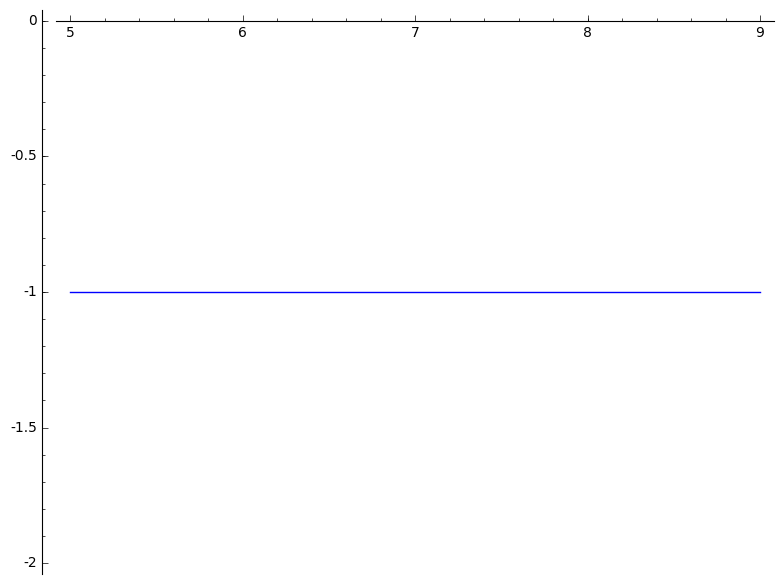

In [5]:
L = []
for i in srange(5, 10):
    L.append((i, buscar(2, i, 1000)))

show(line2d(L))

## Ejercicio 3

(4 puntos) El método BBP que permite calcular una cifra determinada de $\pi$, la $n$-ésima, sin calcular las anteriores se puede aplicar a algunas otras constantes. Por ejemplo, para $log(2)$ se puede usar la serie
$$log(2)=\sum_{k=1}^{\infty}\frac{1}{2^kk}.$$

1) En la primera celda se reproduce el código BPP para $\pi$, y lo primero que debes hacer es modificarlo para que funcione para $log(2)$ mediante la serie indicada. La última función, la que devuelve cifras binarias de $log(2)$, debe llamarse $cifra\_log2(n)$. 

2) Modifica el código del apartado 1) para haga todos los cálculos con una precisión (en bits) arbitraria, es decir, la nueva función debe llamarse $cifra\_log2(n,precis)$.

3) Define una función $compara(C1,C2)$ que, dadas dos cadenas de caracteres,  cuente, hasta la primera discrepancia,  el número de caracteres de $C1$ que ocupan el mismo lugar en $C2$. Es decir, si el primer caracter es diferente debe devolver cero, si el primero es igual pero el segundo es diferente debe devolver uno, etc.

4) Jugando con la función  $cifra\_log2(n,precis)$ se observa que cuanto mayor es la precisión más cifras correctas de $log(2)$, a partir de la $n$-ésima,  devuelve, y que fijada la precisión el número de cifras correctas no depende mucho de $n$ y es del orden de la precisión. 
La parte final del ejercicio consiste en comprobar sistemáticamente  estas afirmaciones, para lo que debemos comparar  cadenas $C1$ generadas por $cifra\_log2(n,precis)$ con la parte relevante de  cadenas $C2$  $$(log(2).n(prec=precis)).str(base=2,no\_sci=2)$$
que nos dan las cifras correctas de $log(2).$ El parámetro $no\_sci=2$ sirve para que no se devuelva el resultado en notación científica estándar (i.e. parte entera de un único dígito, decimales,  y exponente de una potencia de $10$).



In [1]:
def F0(j,n):
    S =RR(0.0)
    k =0 
    while k <= n:
        r = 8*k+j
        S += RR(power_mod(16,n-k,r)/r)-floor(RR(power_mod(16,n-k,r)/r))
        k += 1
    return RR(S)

def F1(j,n):
    S =RR(0.0)
    k =n+1
    while 1:
        r = 8*k+j
        nS = S+ RR(16^(n-k)/r)
        if S == nS:
            break
        else:
            S = nS
        k += 1
    return RR(S)

def S(j,n):
    return RR(F0(j,n)+F1(j,n))

def cifra_pi(n):
    n -= 1
    x = (4*RR(S(1,n))-2*RR(S(4,n))-RR(S(5,n))-RR(S(6,n)))
    return (x-floor(x)).str(base=16,no_sci=2)


Cifras de log(2)


In [2]:
def positivas(n):
    serie = RR(0.0)
    for k in srange(1, n+1):
        sumando = RR(power_mod(2, n-k, k)/k) - floor(RR(power_mod(2, n-k, k)/k))
        serie += sumando
        k += 1
    return serie

def negativas(n):
    serie = RR(0.0)
    k = n + 1
    while 1:
        buff = serie +RR( 2^(n-k)/k)
        if buff == serie:
            break
        serie = buff
        k += 1
    return serie

def cifra_log2(n):
    x = negativas(n) + positivas(n)
    return (x - floor(x)).str(base = 2)

Comprobamos si funciona pidiendo el resultado para n = 0, 1:
Debe darnos en primer lugar los decimales desde el primero, y en segundo lugar desde el segundo

In [3]:
x = log(2).n()
show(x.str(base =2))

show(cifra_log2(0))
show(cifra_log2(1))

'0.10110001011100100001011111110111110100011100111101111'

'0.10110001011100100001011111110111110100011100111101101'

'0.011000101110010000101111111011111010001110011110111011'

In [4]:
'''Modificamos para que realice calculos con prec = precis'''

def positivas_2(n, precis):
    R = RealField(prec=precis)
    serie = R(0)
    
    for k in srange(1, n+1):
        sumando = R(power_mod(2, n-k, k)/k) - floor(R(power_mod(2, n-k, k)/k))
        serie += sumando
        k += 1
    return serie

def negativas_2(n, precis):
    R = RealField(prec=precis)
    serie = R(0)
    
    k = n + 1
    while 1:
        buff = serie +R( 2^(n-k)/k)
        if buff == serie:
            break
        serie = buff
        k += 1
    return serie

def cifra_log2_2(n, precis):
    x = negativas_2(n, precis) + positivas_2(n, precis)
    return (x - floor(x)).str(base = 2)

In [5]:
def compara(c1, c2):
    tope = min(len(c1), len(c2))
    
    for i in srange(0, tope):
        if(c1[i] != c2[i]):
            return i
    return -1

In [6]:
'''Parte final del ejercicio'''

'''A mayor precis, mayor numero de cifras correctas a partir de n: comprobamos'''
n = 0
L = []
L2 = []
for i in srange(10, 151, 5):
    L.append(i)
for precis in L:
    L2.append((precis, compara(a, cifra_log2_2(n, precis))))
 
show(L2)            
             


NameError: name 'a' is not defined

Como -1 es el valor que devuelve la funcion compara en caso de no haber encontrado diferencias, y como hemos comprobado que solo devuelve un valor != -1 para los valores de precis < 60, llegamos a la conlcusión de que incrementar precis obtiene mas cifras exactas de log(2)

Ademas, en los primeros elementos de la lista anterior se observa que, como dice el enunciado, el numero de cifras correctas es mas o menos igual a la precision.


In [7]:
x = log(2).n()
a = x.str(base =2)

show(a)
show(cifra_log2(0))
a2 = a[2:]
show(a2)


'0.10110001011100100001011111110111110100011100111101111'

'0.10110001011100100001011111110111110100011100111101101'

'10110001011100100001011111110111110100011100111101111'